# <center>Jobs and Salaries in Data Science DataSet  </center>


## About Dataset

Dataset got from:
https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download


<div class="alert alert-block alert-info" style="margin-top: 10px">
    
* **work_year**: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

* **job_title:** The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

* **job_category:** A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

* **salary_currency:** The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

* **salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

* **salary_in_usd:** The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

* **employee_residence:** The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

* **experience_level:** Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

* **employment_type:** Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

* **work_setting:** The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

* **company_location:** The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

* **company_size:** The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.
    
</div>

### Importing Libraries

In [30]:
#basic
import pandas as pd
import numpy as np

#basic visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

#Others
from PIL import Image # converting images into arrays
from pywaffle import Waffle#import Waffle from pywaffleç
from wordcloud import WordCloud

<br>

### Fetching Data

In [2]:
#locally
#to read from a csv file in the local computer

path="./jobs_in_data.csv"
data=pd.read_csv(path)
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<br>

### Get Familiar with Data

In [3]:
data.shape

(9355, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [6]:
data['job_title'].unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [7]:
data['employee_residence'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Czech Republic',
       'Netherlands', 'Pakistan', 'Ukraine', 'Lithuania', 'Portugal',
       'Australia', 'Uganda', 'Colombia', 'Italy', 'Slovenia', 'Romania',
       'Greece', 'India', 'Latvia', 'Mauritius', 'Armenia', 'Croatia',
       'Thailand', 'South Korea', 'Estonia', 'Turkey', 'Philippines',
       'Brazil', 'Qatar', 'Russia', 'Kenya', 'Tunisia', 'Ghana',
       'Belgium', 'Switzerland', 'Andorra', 'Ecuador', 'Peru', 'Mexico',
       'Moldova', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Egypt',
       'Uzbekistan', 'Georgia', 'Central African Republic', 'Finland',
       'Austria', 'Singapore', 'Sweden', 'Kuwait', 'Cyprus',
       'Bosnia and Herzegovina', 'Iran', 'American Samoa', 'China',
       'Costa Rica', 'Chile', 'Puerto Rico', 'Denmark', 'Bolivia',
       'Dominican Republic', 'Indonesia', 'United Arab Emirates',
       'Malaysia', 'Japan', 'Hond

In [17]:
data['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [18]:
data['work_setting'].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [19]:
data['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

<br>


### Cleaning Data


**Check columns with  null values**

In [20]:
# df.info() return same info
data_null=data.isnull().sum()
data_null

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [21]:
##in the case of future cleaning
df_clean=data
df_clean.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<br>


### Preparing data

Make a df for experience level counts

In [22]:
df_exp=df_clean['experience_level'].value_counts().to_frame()
df_exp.head()

,experience_level
Senior,6709
Mid-level,1869
Entry-level,496
Executive,281


<br>

Make a df for work setting counts

In [23]:
df_workset=df_clean['work_setting'].value_counts().to_frame()
df_workset.head()

,work_setting
In-person,5730
Remote,3434
Hybrid,191


<br>

Salary in euros

In [117]:
change_usd_to_eur=0.926

df_clean['salary_in_eur']=df_clean.apply(lambda row: row['salary'] * change_usd_to_eur if row['salary_currency'] =='USD' else row['salary'], axis=1) 


df_clean.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_eur
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,88000.0
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,172236.0
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,75746.8
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,196312.0
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,86395.8


In [159]:
df_sal_coun=df_clean.groupby(['company_location']).median(numeric_only=True)
df_sal_coun.reset_index(inplace=True)
df_sal_coun.head()

,company_location,work_year,salary,salary_in_usd,salary_in_eur
0,Algeria,2022.0,100000.0,100000.0,92600.0
1,American Samoa,2022.0,50000.0,50000.0,46300.0
2,Andorra,2023.0,47000.0,50745.0,47000.0
3,Argentina,2023.0,60000.0,60000.0,55560.0
4,Armenia,2023.0,50000.0,50000.0,46300.0


<br>

### Waffle Charts <a id="1"></a>

Study the experience level proportion

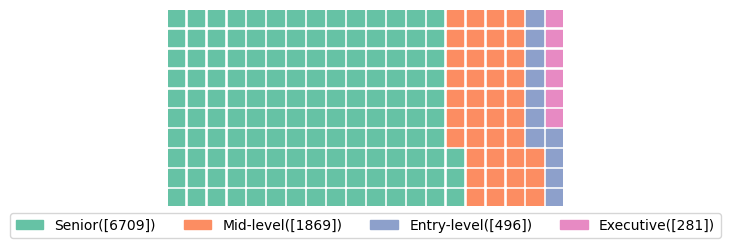

In [24]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 10, 
                 columns = 20, 
                 values = df_exp['experience_level'],
                 legend={'labels': [f"{a}({b})" for a, b in zip(df_exp.index , df_exp.values)],
                         'loc':'lower center',
                         'ncol': df_exp.shape[0],
                         'bbox_to_anchor':(0.5,-0.2) }
                )
                 
plt.show()

<br>

Study the work setting proportion

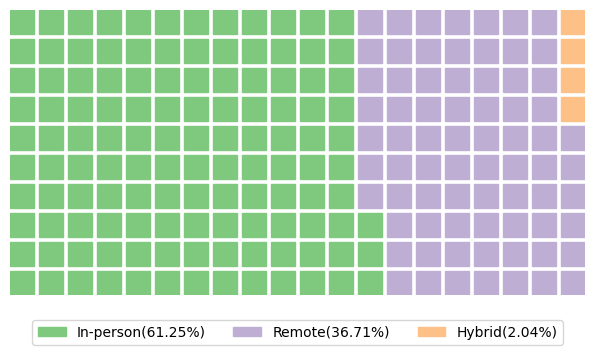

In [25]:
#https://matplotlib.org/stable/gallery/color/colormap_reference.html

percentage=((df_workset['work_setting'])*100/(df_workset['work_setting'].sum()))


fig = plt.figure(FigureClass = Waffle,
                 rows = 10, 
                 columns = 20, 
                 values = df_workset['work_setting'],
                 legend={'labels': [f"{a}({b:.2f}%)" for a, b in zip(df_workset.index , percentage )],
                         'loc':'lower center',
                         'ncol': df_exp.shape[0],
                         'bbox_to_anchor':(0.5,-0.2) },
                 cmap_name = 'Accent',
                )

plt.show()


<br>

### Word Cloud  <a id="2"></a>

Study job title 

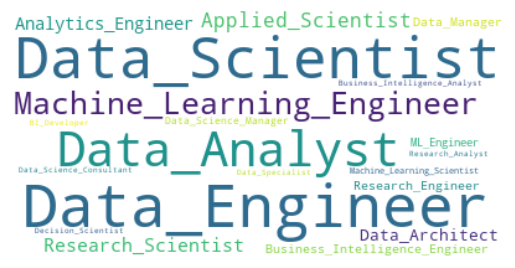

In [31]:
job_df=(df_clean['job_title']).to_frame()
job_lst= ' '.join(job_df['job_title'].str.replace(' ', '_').tolist())


job_cloud = WordCloud(max_words=20, collocations=False, background_color='white').generate(job_lst)

plt.imshow(job_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

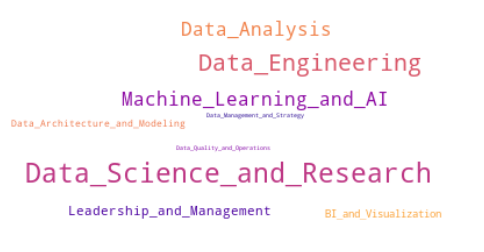

In [63]:
jobc_df=(df_clean['job_category']).to_frame()
jobc_lst= ' '.join(jobc_df['job_category'].str.replace(' ', '_').tolist())


jobc_cloud = WordCloud(max_words=20, collocations=False, background_color='white', colormap='plasma').generate(jobc_lst)

plt.figure(figsize=(6, 6))
plt.imshow(jobc_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<br>

Study Country of procedence and mask with a world map

<function matplotlib.pyplot.show(close=None, block=None)>

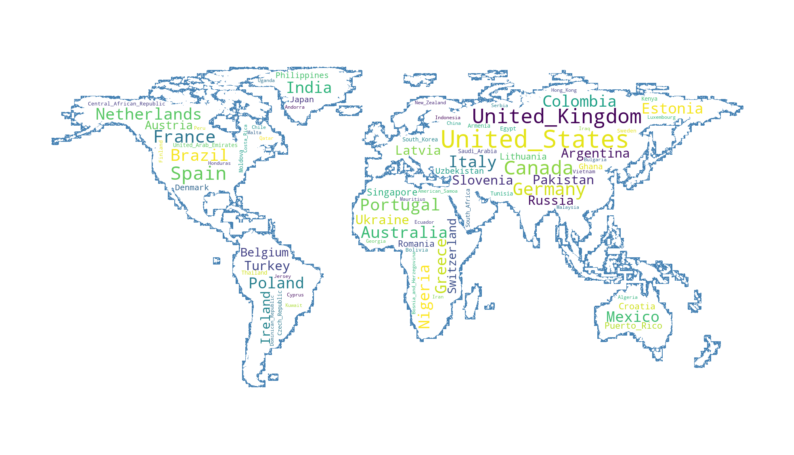

In [105]:
country_df=df_clean.loc[:,['employee_residence']]
country_lst=' '.join(country_df['employee_residence'].str.replace(' ','_').tolist())

worldmap_mask = np.array(Image.open("world_map.jpg"))
country_cloud=WordCloud(relative_scaling=0.1, collocations=False, background_color='white',mask=worldmap_mask, contour_width=1, contour_color='steelblue').generate(country_lst)


plt.figure(figsize=(10, 6))
plt.imshow(country_cloud, interpolation='bilinear')
plt.axis('off')
plt.show

<br>

### Seaborn <a id="3"></a>

Study the trend year vs salary
Example of continuos data

In [118]:
#I choose the median more representative than the mean due to outliers
df_work=df_clean.groupby(['work_year'], axis=0).median(numeric_only=True)
df_work.reset_index(inplace=True)
df_work['work_year'].astype(int)
df_work

,work_year,salary,salary_in_usd,salary_in_eur
0,2020,85000.0,87000.0,80562.0
1,2021,90000.0,90000.0,86256.9
2,2022,134000.0,133883.0,124084.0
3,2023,147100.0,147100.0,136214.6


Text(0.5, 1.0, 'Data Science Jobs Salary Evolution')

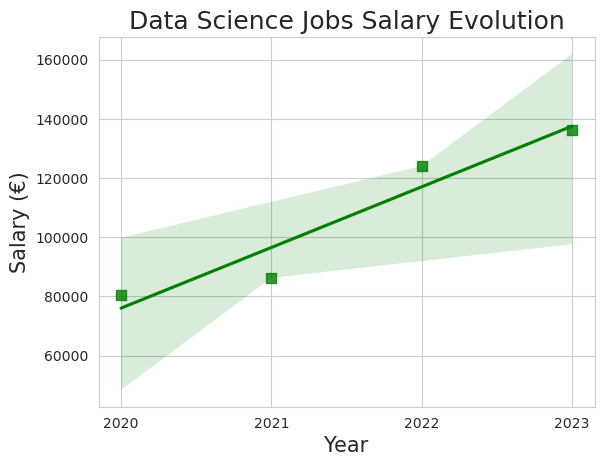

In [121]:
with sns.axes_style("whitegrid"):
    ax=sns.regplot(x='work_year', y='salary_in_eur', data=df_work, color='green', marker='s', scatter_kws={'s': 50})


plt.xticks(df_work['work_year']) # to put the exact values of the x-axis


ax.set_xlabel('Year', fontsize=15) 
ax.set_ylabel('Salary (€)', fontsize=15) 
ax.set_title('Data Science Jobs Salary Evolution', fontsize=18)


<br>

Study the frequency of job category 
Example of categorical data

In [122]:
df_category=df_clean.groupby(['job_category']).median(numeric_only=True)
df_category.reset_index(inplace=True)

[Text(0, 0, 'BI and\nVisualization'),
 Text(1, 0, 'Cloud and\nDatabase'),
 Text(2, 0, 'Data\nAnalysis'),
 Text(3, 0, 'Data\nArchitecture\nand\nModeling'),
 Text(4, 0, 'Data\nEngineering'),
 Text(5, 0, 'Data\nManagement\nand\nStrategy'),
 Text(6, 0, 'Data\nQuality\nand\nOperations'),
 Text(7, 0, 'Data\nScience\nand\nResearch'),
 Text(8, 0, 'Leadership\nand\nManagement'),
 Text(9, 0, 'Machine\nLearning\nand AI')]

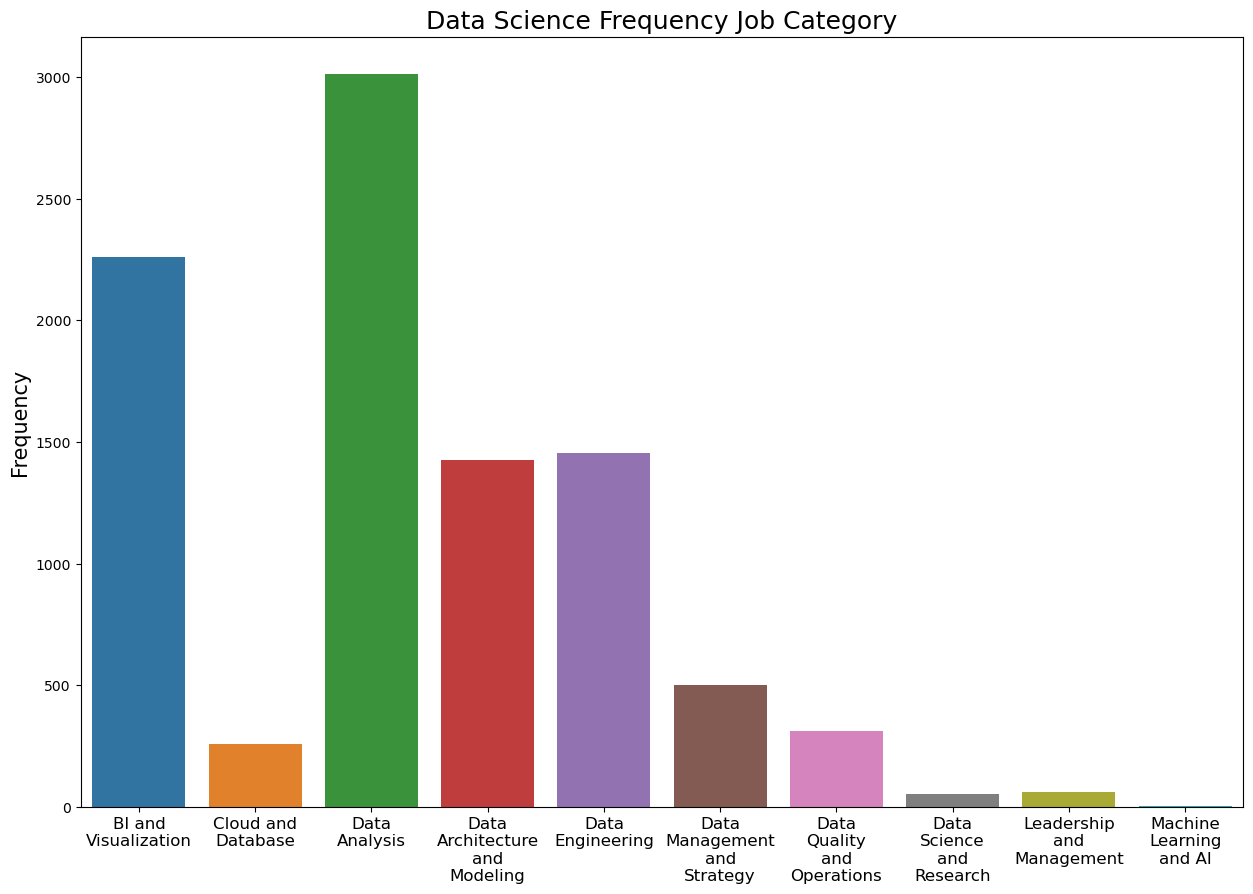

In [139]:
import textwrap # to avoid xlabel solape 
plt.figure(figsize=(15, 10))
ax=sns.countplot(x='job_category', data=df_clean)

ax.set_ylabel('Frequency', fontsize=15) 
ax.set_title('Data Science Frequency Job Category', fontsize=18)
ax.set_xlabel('', fontsize=15) 

labels = [textwrap.fill(label, width=10,  break_long_words=False) for label in df_category['job_category']]
ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=12)


<br>

Study the trend job category vs salary
Example of categorical data

[Text(0, 0, 'BI and\nVisualization'),
 Text(1, 0, 'Cloud and\nDatabase'),
 Text(2, 0, 'Data\nAnalysis'),
 Text(3, 0, 'Data\nArchitecture\nand\nModeling'),
 Text(4, 0, 'Data\nEngineering'),
 Text(5, 0, 'Data\nManagement\nand\nStrategy'),
 Text(6, 0, 'Data\nQuality\nand\nOperations'),
 Text(7, 0, 'Data\nScience\nand\nResearch'),
 Text(8, 0, 'Leadership\nand\nManagement'),
 Text(9, 0, 'Machine\nLearning\nand AI')]

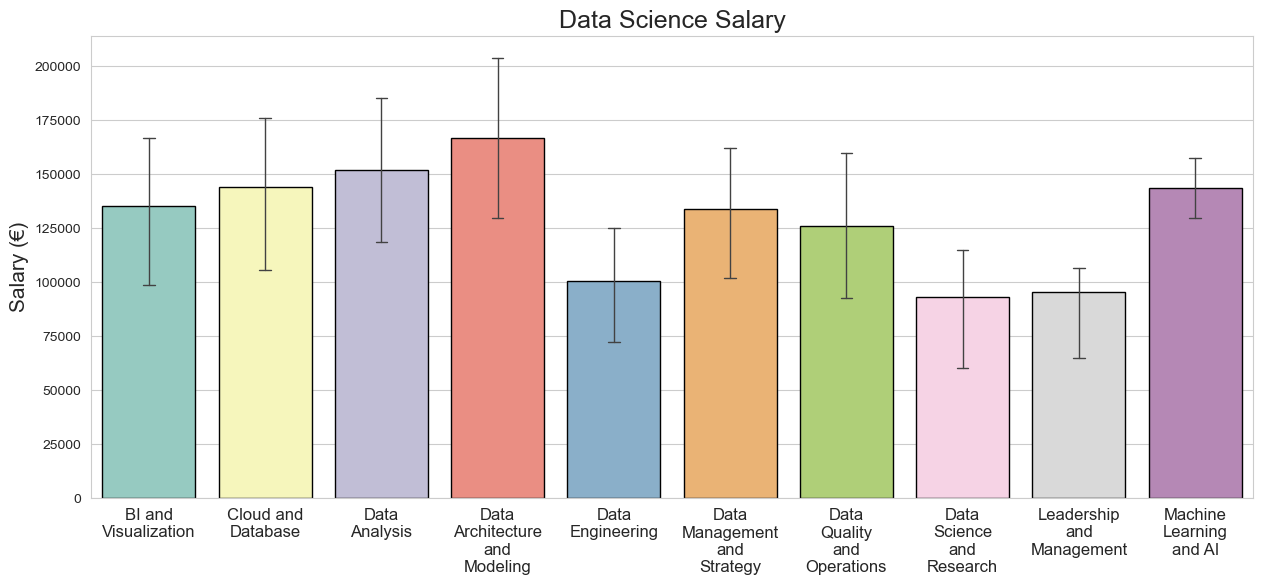

In [153]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x='job_category', y='salary_in_eur', data=df_clean, edgecolor='black', palette='Set3', errwidth=1, errorbar=("pi", 50), capsize=.1)

ax.set_ylabel('Salary (€)', fontsize=15) 
ax.set_title('Data Science Salary', fontsize=18)
ax.set_xlabel('', fontsize=15)


labels = [textwrap.fill(label, width=10,  break_long_words=False) for label in df_category['job_category']]
ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=12)

<br>

Study the trend  salary vs company location

In [172]:
df_sal_coun.sort_values(by=['salary_in_eur'], ascending=False, inplace=True)
df_sal_loc=df_sal_coun.head(15)
df_sal_loc

,company_location,work_year,salary,salary_in_usd,salary_in_eur
53,Qatar,2023.0,300000.0,300000.0,277800.000
65,Turkey,2022.0,180000.0,20171.0,180000.000
52,Puerto Rico,2022.0,167500.0,167500.0,155105.000
35,Japan,2021.0,164000.0,164000.0,151864.000
50,Poland,2022.5,140000.0,45465.0,140000.000
69,United States,2023.0,150000.0,150000.0,138900.000
33,Israel,2022.0,137500.0,117029.5,133245.000
11,Canada,2023.0,142600.0,140000.0,132418.000
5,Australia,2022.5,131750.0,99421.5,126477.500
56,Saudi Arabia,2023.0,134999.0,134999.0,125009.074


[Text(0, 0, 'Qatar'),
 Text(1, 0, 'Turkey'),
 Text(2, 0, 'Puerto\nRico'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'Poland'),
 Text(5, 0, 'United\nStates'),
 Text(6, 0, 'Israel'),
 Text(7, 0, 'Canada'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Saudi\nArabia'),
 Text(10, 0, 'Denmark'),
 Text(11, 0, 'New\nZealand'),
 Text(12, 0, 'Bosnia and\nHerzegovina'),
 Text(13, 0, 'United\nArab\nEmirates'),
 Text(14, 0, 'Switzerland')]

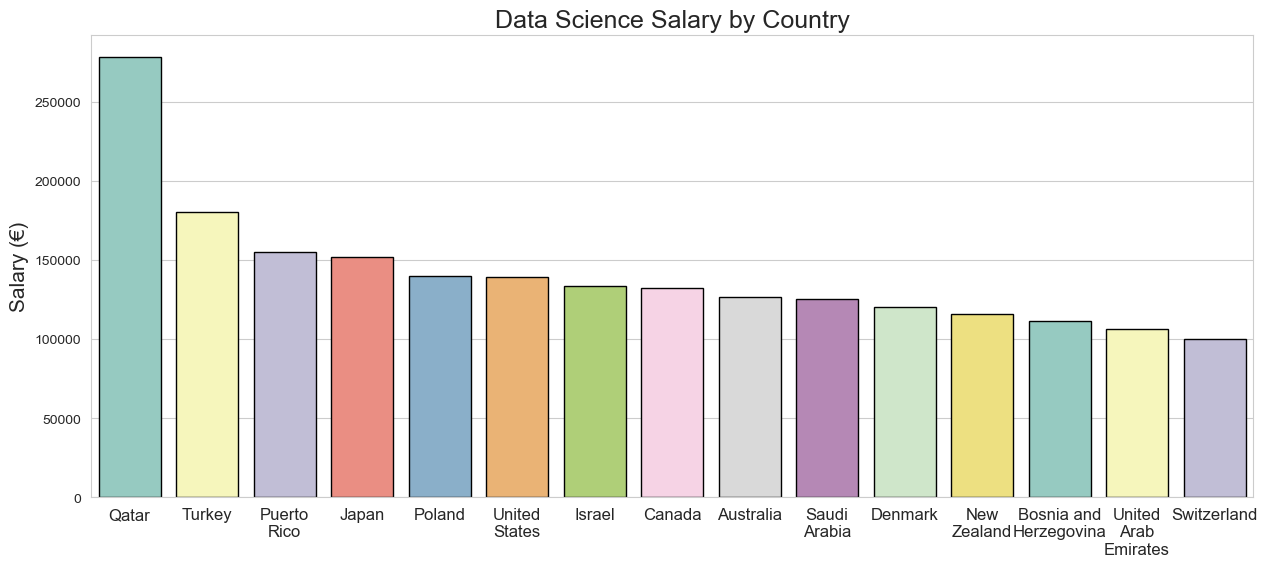

In [173]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x='company_location', y='salary_in_eur', data=df_sal_loc, edgecolor='black', palette='Set3', errwidth=1, errorbar=("pi", 50), capsize=.1)

ax.set_ylabel('Salary (€)', fontsize=15) 
ax.set_title('Data Science Salary by Country', fontsize=18)
ax.set_xlabel('', fontsize=15)


labels = [textwrap.fill(label, width=10,  break_long_words=False) for label in df_sal_loc['company_location']]
ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=12)

<br>

# Author

<a>Eva Villar Álvarez</a>
2024/02/02

<br>

 **Change Log**

| Date (YYYY-MM-DD) | Version |      Change Description                                   | 
| ----------------- | ------- |---------------------------------------------------------- |
